## Payment Transaction: Indication of fraud attempt
**Problem Statement: Predict whether a given transaction is a part of the revenue or a fraud attempt**

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore") # suppress all warnings 

# Building the Model and importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('Payments_Fraud_Dataset.csv', parse_dates=['cardExpDate'])
df.head(3)

,transAmount,transCurrency,transDescription,transChannel,cardType,cardNetwork,cardExpDate,cardCompany,city,zipCode,...,customer.custState,customer.custCountry,customer.custPostalCode,customer.lat,customer.lon,storePOS.storeName,storePOS.storeRiskScore,storePOS.storeType,dollar_amount,fraud_flag
0,3148.373643,pound,Vel distinctio delen,MOBILE,debit,visa,22-Aug,Mueller-Mueller,Edmond,73025,...,OK,US,73025,35.652832,-97.478096,NaN,NaN,NaN,4143.259714,1
1,2568.039084,dollar,Voluptatibus non vol,POS,credit,visa,20-Jan,"Frami, Frami and Frami",Clarkston,99403,...,VT,US,5907,44.988780,-71.788440,Lowe-Lowe,0.001269,Ella,2568.039084,1
2,2834.344553,pound,Corrupti nihil itaqu,WEB,credit,americanexpress,22-Aug,Daniel and Sons,PostFalls,83877,...,ID,US,83877,47.718056,-116.950554,NaN,NaN,NaN,3729.997431,0


In [3]:
df.shape 

(1000, 61)

In [4]:
# 2. dropping columns(8) with all null values 
df.dropna(axis = 1, how ='all', inplace = True) 

In [5]:
df.shape

(1000, 61)

In [6]:
#converting int datatype to object
df['fraud_flag']=df['fraud_flag'].apply(str)

In [7]:
# Separating the Numerical Variables
num_df=df.select_dtypes(include=['int64', 'float64']).copy()
num_df.head()

,transAmount,zipCode,latitude,longitude,posDetails.lat,posDetails.lon,mobileDetails.userLat,mobileDetails.userLong,paymentCard.cardLimit,paymentCard.cardBalance,customer.customerAvgSpending,customer.customerRiskScore,customer.custStreet2,customer.custPostalCode,customer.lat,customer.lon,storePOS.storeRiskScore,dollar_amount
0,3148.373643,73025,35.652832,-97.478096,NaN,NaN,30.727622,-159.614790,405430.1673,87471.16409,4408.430624,0.501168,637,73025,35.652832,-97.478096,NaN,4143.259714
1,2568.039084,99403,46.394623,-117.064461,46.394623,-117.06446,NaN,NaN,751934.2058,90193.85018,3392.749690,0.529389,860,5907,44.988780,-71.788440,0.001269,2568.039084
2,2834.344553,83877,47.718056,-116.950554,NaN,NaN,NaN,NaN,151800.7076,95162.11175,6658.768659,0.050233,893,83877,47.718056,-116.950554,NaN,3729.997431
3,2711.427071,22551,38.200966,-77.589157,NaN,NaN,25.439331,65.590348,737600.6345,95529.95420,6549.566403,0.395297,861,22551,38.200966,-77.589160,NaN,3568.238026
4,143.000000,85658,32.436737,-111.225380,NaN,NaN,-88.436615,-58.664984,493635.9065,67422.43502,7862.513653,0.493555,450,85658,32.436737,-111.225380,NaN,2.197910


In [8]:
num_df.shape

(1000, 18)

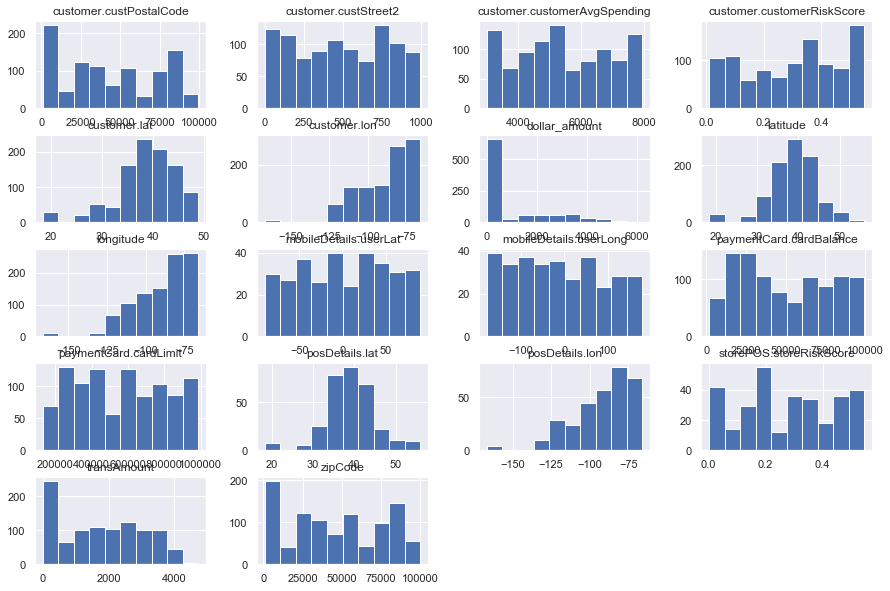

In [9]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
num_df.hist(ax=ax)
plt.show()

In [10]:
# How much data is missing for each variables?
percent_missing = num_df.isnull().sum() * 100 / len(df)
percent_missing

transAmount                      0.0
zipCode                          0.0
latitude                         0.0
longitude                        0.0
posDetails.lat                  68.4
posDetails.lon                  68.4
mobileDetails.userLat           67.8
mobileDetails.userLong          67.8
paymentCard.cardLimit            0.0
paymentCard.cardBalance          0.0
customer.customerAvgSpending     0.0
customer.customerRiskScore       0.0
customer.custStreet2             0.0
customer.custPostalCode          0.0
customer.lat                     0.0
customer.lon                     0.0
storePOS.storeRiskScore         68.4
dollar_amount                    0.0
dtype: float64

In [11]:
#Imputing the missing values by their corresponding means
num_df["storePOS.storeRiskScore"].fillna(num_df["storePOS.storeRiskScore"].mean(), inplace=True)
num_df["posDetails.lat"].fillna(num_df["posDetails.lat"].mean(), inplace=True)
num_df["posDetails.lon"].fillna(num_df["posDetails.lon"].mean(), inplace=True)
num_df["mobileDetails.userLat"].fillna(num_df["mobileDetails.userLat"].mean(), inplace=True)
num_df["mobileDetails.userLong"].fillna(num_df["mobileDetails.userLong"].mean(), inplace=True)

In [12]:
#checking whther any missing values
num_df.isnull().sum()

transAmount                     0
zipCode                         0
latitude                        0
longitude                       0
posDetails.lat                  0
posDetails.lon                  0
mobileDetails.userLat           0
mobileDetails.userLong          0
paymentCard.cardLimit           0
paymentCard.cardBalance         0
customer.customerAvgSpending    0
customer.customerRiskScore      0
customer.custStreet2            0
customer.custPostalCode         0
customer.lat                    0
customer.lon                    0
storePOS.storeRiskScore         0
dollar_amount                   0
dtype: int64

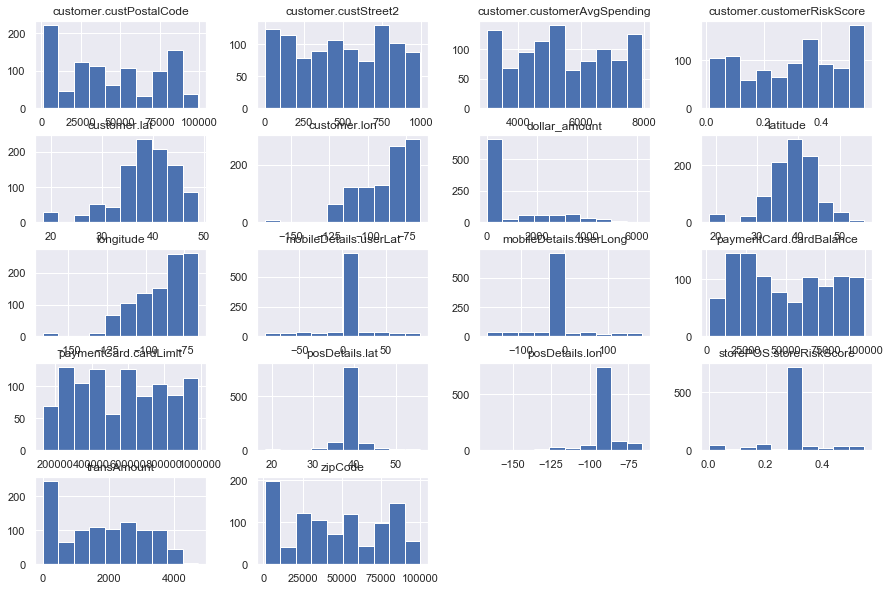

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
num_df.hist(ax=ax)
plt.show()

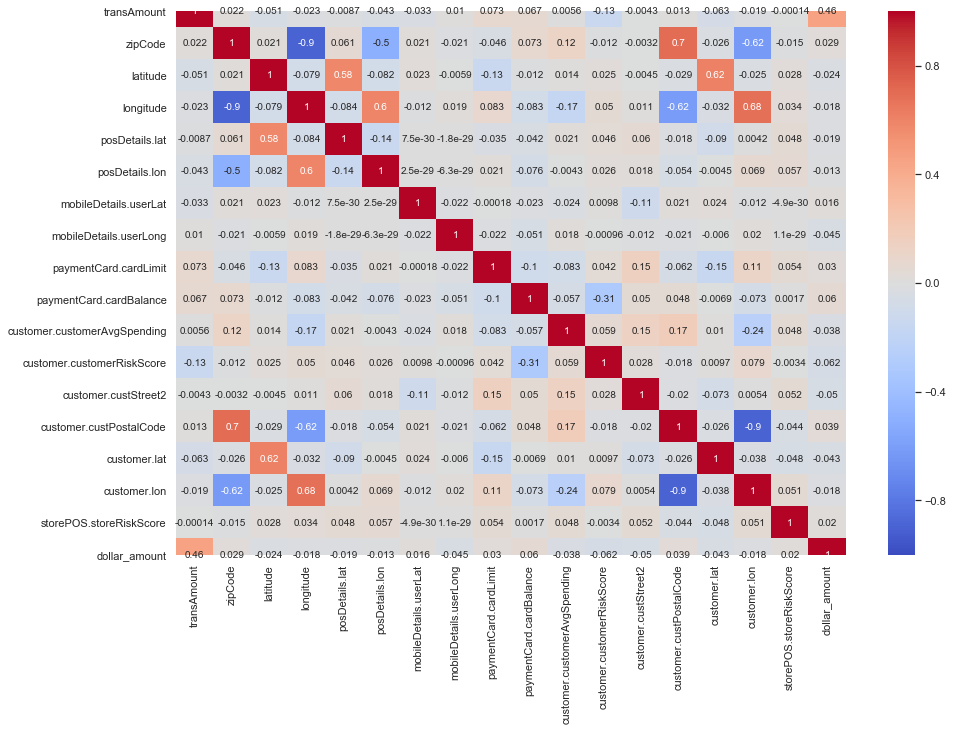

In [14]:
# generating correlation heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(), vmin=-1,cmap='coolwarm', annot=True);

In [15]:
# Scaling the numerical variables  
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(num_df),columns = num_df.columns)

In [16]:
df_scaled.head(5)

,transAmount,zipCode,latitude,longitude,posDetails.lat,posDetails.lon,mobileDetails.userLat,mobileDetails.userLong,paymentCard.cardLimit,paymentCard.cardBalance,customer.customerAvgSpending,customer.customerRiskScore,customer.custStreet2,customer.custPostalCode,customer.lat,customer.lon,storePOS.storeRiskScore,dollar_amount
0,1.070398,0.861626,-0.513390,-0.404736,-3.947905e-15,2.740588e-15,9.674400e-01,-2.543074e+00,-0.622738,1.339122,-0.709786,1.176455,0.490639,0.931046,-0.511860,-0.477102,-5.947587e-16,2.163081
1,0.608056,1.740994,1.227787,-1.537747,2.011724e+00,-2.300777e+00,-3.018221e-17,-6.043583e-17,0.797130,1.434425,-1.406581,1.345436,1.238952,-1.304048,1.026238,1.039963,-2.970155e+00,1.078515
2,0.820217,1.223401,1.442307,-1.531158,-3.947905e-15,2.740588e-15,-3.018221e-17,-6.043583e-17,-1.662034,1.608330,0.834029,-1.523581,1.349689,1.292429,1.475886,-1.627018,-5.947587e-16,1.878543
3,0.722291,-0.821033,-0.100354,0.745777,-3.947905e-15,2.740588e-15,7.877326e-01,1.287930e+00,0.738396,1.621206,0.759112,0.542541,1.242308,-0.749787,-0.092055,0.697410,-5.947587e-16,1.767169
4,-1.323926,1.282775,-1.034699,-1.199974,-3.947905e-15,2.740588e-15,-3.082016e+00,-8.257992e-01,-0.261297,0.637350,1.659843,1.130874,-0.136871,1.351738,-1.041712,-1.288927,-5.947587e-16,-0.688110


In [17]:
# Separating the Categorical Variables
cat_df = df.select_dtypes(exclude=['int64','float64']).copy()
cat_df.nunique()
cat_df.head()

,transCurrency,transDescription,transChannel,cardType,cardNetwork,cardExpDate,cardCompany,city,deviceType,posPostalCodeType,...,customer.custGender,customer.custMaritalStatus,customer.custIncomeLevel,customer.custStreet1,customer.custCity,customer.custState,customer.custCountry,storePOS.storeName,storePOS.storeType,fraud_flag
0,pound,Vel distinctio delen,MOBILE,debit,visa,22-Aug,Mueller-Mueller,Edmond,symbian,NoPOS,...,Male,Married,Very High,Darrick Dale,Edmond,OK,US,NaN,NaN,1
1,dollar,Voluptatibus non vol,POS,credit,visa,20-Jan,"Frami, Frami and Frami",Clarkston,POS,Bank,...,Male,Other,High,Zieme Walks,Norton,VT,US,Lowe-Lowe,Ella,1
2,pound,Corrupti nihil itaqu,WEB,credit,americanexpress,22-Aug,Daniel and Sons,PostFalls,ub,NoPOS,...,Male,Married,Low,Juana Street,PostFalls,ID,US,NaN,NaN,0
3,pound,Enim porro quaerat.,MOBILE,debit,mastercard,20-Mar,Fritsch-Fritsch,Spotsylvania,android,NoPOS,...,Female,Married,Low,Legros Throughway,Spotsylvania,VA,US,NaN,NaN,0
4,rupee,Atque et inventore a,MOBILE,prepaid,mastercard,20-Jan,Langworth-Langworth,Marana,android,NoPOS,...,Female,Unmarried,Low,Maegan Mews,Marana,AZ,US,NaN,NaN,0


In [18]:
cat_df.shape

(1000, 43)

In [19]:
cat_df.isnull().sum()

transCurrency                       0
transDescription                    0
transChannel                        0
cardType                            0
cardNetwork                         0
cardExpDate                         0
cardCompany                         0
city                                0
deviceType                          0
posPostalCodeType                   0
country                             0
state                               0
posDetails.geoStreet1             684
posDetails.geoCity                684
posDetails.geoState               684
posDetails.geoCountry             684
posDetails.geoPostalCodeType      684
mobileDetails.deviceName          678
mobileDetails.deviceOS            678
mobileDetails.deviceNetwork       678
mobileDetails.appName             678
mobileDetails.deviceIP            678
webDetails.deviceMacAddr          638
webDetails.deviceIP               638
webDetails.browser                638
webDetails.deviceOS               638
webDetails.h

In [20]:
#Imputing the missing values by their corresponding mode
cat_df["posDetails.geoStreet1"].fillna(cat_df["posDetails.geoStreet1"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoCity"].fillna(cat_df["posDetails.geoCity"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoState"].fillna(cat_df["posDetails.geoState"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoCountry"].fillna(cat_df["posDetails.geoCountry"].mode().iloc[0],inplace=True)
cat_df["posDetails.geoPostalCodeType"].fillna(cat_df["posDetails.geoPostalCodeType"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.deviceOS"].fillna(cat_df["mobileDetails.deviceOS"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.deviceNetwork"].fillna(cat_df["mobileDetails.deviceNetwork"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.appName"].fillna(cat_df["mobileDetails.appName"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.deviceName"].fillna(cat_df["mobileDetails.deviceName"].mode().iloc[0],inplace=True)
cat_df["mobileDetails.deviceIP"].fillna(cat_df["mobileDetails.deviceIP"].mode().iloc[0],inplace=True)
cat_df["webDetails.deviceMacAddr"].fillna(cat_df["webDetails.deviceMacAddr"].mode().iloc[0],inplace=True)
cat_df["webDetails.hostURL"].fillna(cat_df["webDetails.hostURL"].mode().iloc[0],inplace=True)
cat_df["webDetails.browser"].fillna(cat_df["webDetails.browser"].mode().iloc[0],inplace=True)
cat_df["webDetails.deviceOS"].fillna(cat_df["webDetails.deviceOS"].mode().iloc[0],inplace=True)
cat_df["webDetails.deviceIP"].fillna(cat_df["webDetails.deviceIP"].mode().iloc[0],inplace=True)
cat_df["storePOS.storeName"].fillna(cat_df["storePOS.storeName"].mode().iloc[0],inplace=True)
cat_df["storePOS.storeType"].fillna(cat_df["storePOS.storeType"].mode().iloc[0],inplace=True)

In [21]:
# Check the missing values if any
cat_df.isnull().sum()

transCurrency                     0
transDescription                  0
transChannel                      0
cardType                          0
cardNetwork                       0
cardExpDate                       0
cardCompany                       0
city                              0
deviceType                        0
posPostalCodeType                 0
country                           0
state                             0
posDetails.geoStreet1             0
posDetails.geoCity                0
posDetails.geoState               0
posDetails.geoCountry             0
posDetails.geoPostalCodeType      0
mobileDetails.deviceName          0
mobileDetails.deviceOS            0
mobileDetails.deviceNetwork       0
mobileDetails.appName             0
mobileDetails.deviceIP            0
webDetails.deviceMacAddr          0
webDetails.deviceIP               0
webDetails.browser                0
webDetails.deviceOS               0
webDetails.hostURL                0
paymentCard.cardType        

[Text(0, 0.5, 'samples'),
 Text(0.5, 1.0, 'Fraud_Flag class distribution Before SMOTE')]

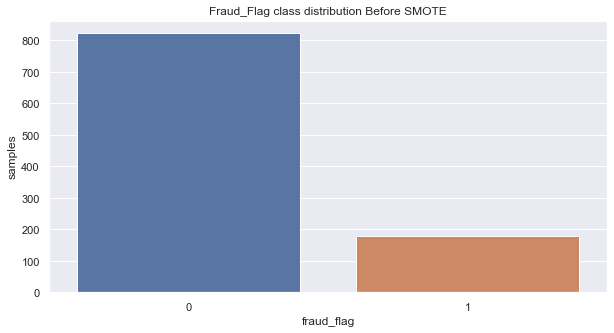

In [22]:
# fraud_flag distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(data=cat_df, x=cat_df.fraud_flag)
ax.set(ylabel='samples',title="Fraud_Flag class distribution Before SMOTE")

In [23]:
# Defining the response variable dataframe
y=cat_df[['fraud_flag']]
del cat_df['fraud_flag']

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe = pd.DataFrame(ohe.fit_transform(cat_df).toarray())
df_ohe.columns = ohe.get_feature_names(cat_df.columns)
df_ohe.head()

,transCurrency_dollar,transCurrency_pound,transCurrency_rupee,transCurrency_yen,transDescription_A dolor qui. Et et e,transDescription_A dolores iure non v,transDescription_A id et maiores quia,transDescription_A nemo laudantium qu,transDescription_Ab minus repellendus,transDescription_Ab quaerat consequat,...,storePOS.storeType_Saige,storePOS.storeType_Shayna,storePOS.storeType_Soledad,storePOS.storeType_Terrance,storePOS.storeType_Tod,storePOS.storeType_Verner,storePOS.storeType_Wanda,storePOS.storeType_Whitney,storePOS.storeType_Wilma,storePOS.storeType_Zella
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Independent Dataset
X=pd.concat([df_scaled, df_ohe], axis=1)
f_df=pd.concat([X, y], axis=1)
f_df.head(5)

,transAmount,zipCode,latitude,longitude,posDetails.lat,posDetails.lon,mobileDetails.userLat,mobileDetails.userLong,paymentCard.cardLimit,paymentCard.cardBalance,...,storePOS.storeType_Shayna,storePOS.storeType_Soledad,storePOS.storeType_Terrance,storePOS.storeType_Tod,storePOS.storeType_Verner,storePOS.storeType_Wanda,storePOS.storeType_Whitney,storePOS.storeType_Wilma,storePOS.storeType_Zella,fraud_flag
0,1.070398,0.861626,-0.513390,-0.404736,-3.947905e-15,2.740588e-15,9.674400e-01,-2.543074e+00,-0.622738,1.339122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.608056,1.740994,1.227787,-1.537747,2.011724e+00,-2.300777e+00,-3.018221e-17,-6.043583e-17,0.797130,1.434425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.820217,1.223401,1.442307,-1.531158,-3.947905e-15,2.740588e-15,-3.018221e-17,-6.043583e-17,-1.662034,1.608330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.722291,-0.821033,-0.100354,0.745777,-3.947905e-15,2.740588e-15,7.877326e-01,1.287930e+00,0.738396,1.621206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.323926,1.282775,-1.034699,-1.199974,-3.947905e-15,2.740588e-15,-3.082016e+00,-8.257992e-01,-0.261297,0.637350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
# USING RANDOM FOREST FOR FEATURE SELECTION
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [27]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)

# Fitting the classifier
rfc.fit(X, y)

# Printing the name of each feature along with the gini value
for feature in zip(X.columns, rfc.feature_importances_):
    #print(feature)
    pass

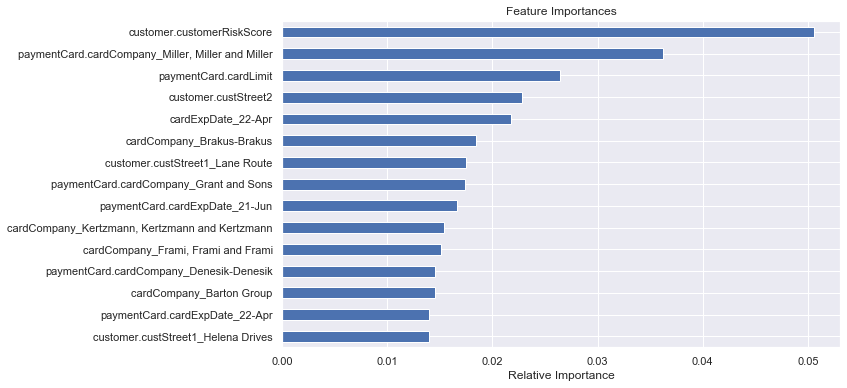

In [28]:
# Plotting top 10 feature importance
plt.figure(figsize=(10,6))
plt.title('Feature Importances')   
plt.xlabel('Relative Importance')   

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.sort_values()
feat_importances.nlargest(15).sort_values().plot(kind='barh')
plt.show()

In [29]:
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.01)
sfm.fit(X, y)

featureList = []

# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    featureList.append(X.columns[feature_list_index])

In [30]:
# Preparing the X and Y
y=f_df[['fraud_flag']]
X_imp = X[featureList]
X_imp.shape

(1000, 27)

In [31]:
# Building the Model and importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score,confusion_matrix,classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, random_state=0)

In [33]:
clf_Random = RandomForestClassifier().fit(X_train, y_train)

pred_random=clf_Random.predict(X_test)

print('Accuracy Score :', accuracy_score(y_test,pred_random))
print('f1_score: ',f1_score(y_test, pred_random, average='weighted') )   #average can be used as 'micro' or 'macro' too
print('Recall:', recall_score(y_test, pred_random, average='weighted'))
print('Precision:', precision_score(y_test, pred_random, average='weighted'))

Accuracy Score : 0.992
f1_score:  0.9919432789432788
Recall: 0.992
Precision: 0.9920804020100502


In [34]:
clf_Logistics = LogisticRegression().fit(X_train, y_train)

pred_logistics=clf_Logistics.predict(X_test)

print('Accuracy Score :', accuracy_score(y_test,pred_logistics))
print('f1_score: ',f1_score(y_test, pred_logistics, average='weighted') )   #average can be used as 'micro' or 'macro' too
print('Recall:', recall_score(y_test, pred_logistics, average='weighted'))
print('Precision:', precision_score(y_test, pred_logistics, average='weighted'))

Accuracy Score : 0.956
f1_score:  0.9551865803121664
Recall: 0.956
Precision: 0.9555420792079208


In [35]:
clf_DecisionTree = DecisionTreeClassifier().fit(X_train, y_train)

pred_DecisionTree=clf_DecisionTree.predict(X_test)

print('Accuracy Score :', accuracy_score(y_test,pred_DecisionTree))
print('f1_score: ',f1_score(y_test, pred_DecisionTree, average='weighted') )   #average can be used as 'micro' or 'macro' too
print('Recall:', recall_score(y_test, pred_DecisionTree, average='weighted'))
print('Precision:', precision_score(y_test, pred_DecisionTree, average='weighted'))

Accuracy Score : 0.992
f1_score:  0.9919432789432788
Recall: 0.992
Precision: 0.9920804020100502


In [ ]:
# Saving the Model for future use
'''
f = open('paymentclassifier.pickle','wb')
pickle.dump(clf_Random,f)
f.close()

f = open('featureList.pickle','wb')
pickle.dump(featureList,f)
f.close()

f = open('onehotencodingpayment.pickle','wb')
pickle.dump(ohe,f)
f.close()

f = open('standardscalar.pickle','wb')
pickle.dump(ss,f)
f.close()
'''